DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=-32 +lat_0=90 +lat_ts=80 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-68,44)
DEBUG:root:Grid spacing in projection coords: (5.5e+03,5.5e+03)
DEBUG:root:Number of grid Nodes in x/y      : ( 1200, 1400)
DEBUG:root:Min   x projection coordinate = -3.16e+06
DEBUG:root:Max   x projection coordinate = 3.45e+06
DEBUG:root:Min   y projection coordinate = -4.35e+06
DEBUG:root:Max   y projection coordinate = 3.36e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 42.6
DEBUG:root:Max lat = 90


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(11, 11) (10, 10)


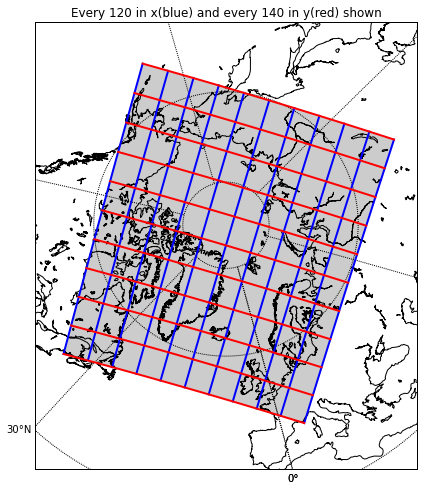

DEBUG:root:Endianness set to big


In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import modeltools.bathy
import modeltools.hycom.io
import numpy
grid1=modeltools.grid.Proj4Grid("+proj=stere +lon_0=-32 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -68,44,5500,5500,1200,1400)
figure=grid1.plotgrid(1.5)
matplotlib.pyplot.show()


modeltools.hycom.io.write_regional_grid(grid1)



/usr/local/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)
DEBUG:root:Filtering width half-width = 3 grid cells


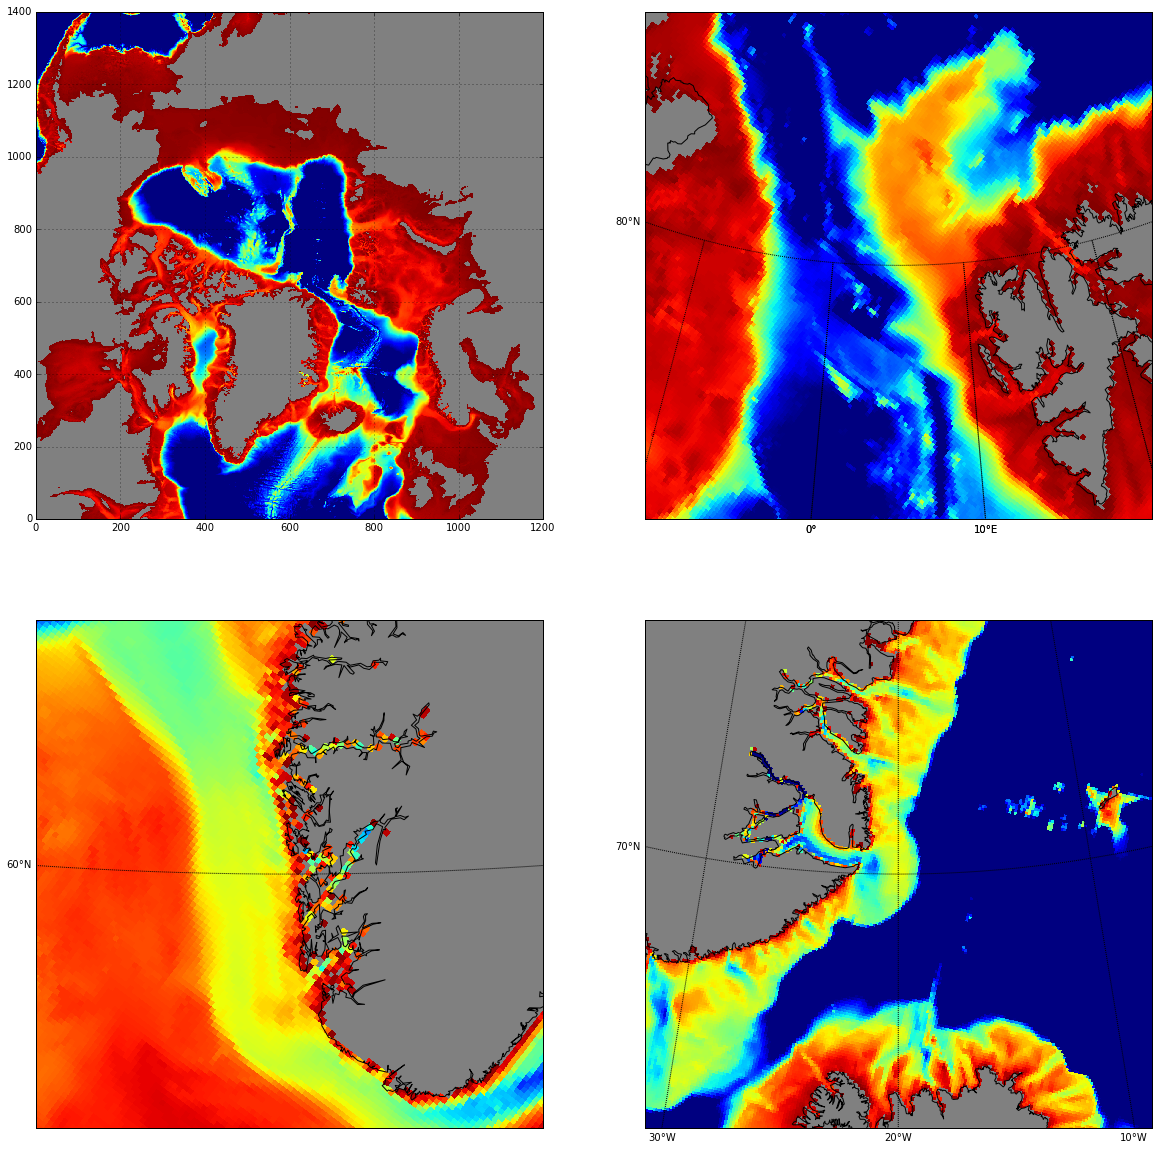

In [60]:
from mpl_toolkits.basemap import Basemap
gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=modeltools.bathy.default_threshold,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


PAss 1
Found 2816 one neighbour cells
Found 647 one neighbour cells
Found 265 one neighbour cells
Found 127 one neighbour cells
Found 71 one neighbour cells
Found 41 one neighbour cells
Found 24 one neighbour cells
Found 13 one neighbour cells
Found 7 one neighbour cells
Found 3 one neighbour cells
Found 3 one neighbour cells
Found 2 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 0 one neighbour cells
Main feature in terms of cells is feature 5
Position (  0.000, 60.000) : Feature 5 is used
Position ( 36.000, 75.000) : Feature 5 is used
Found 1341 islets
Found 209 islets
Found 38 islets
Found 23 islets
Found 8 islets
Found 3 islets
Found 2 islets
Found 1 islets
Found 1 islets
Found 0 islets
PAss 2
Found 0 one neighbour cells
Main feature in terms of cells is feature 1
Position (  0.000, 60.000) : Feature 1 is used
Position ( 36.000, 75.000) : Feature 1 is used
Found 0 islets


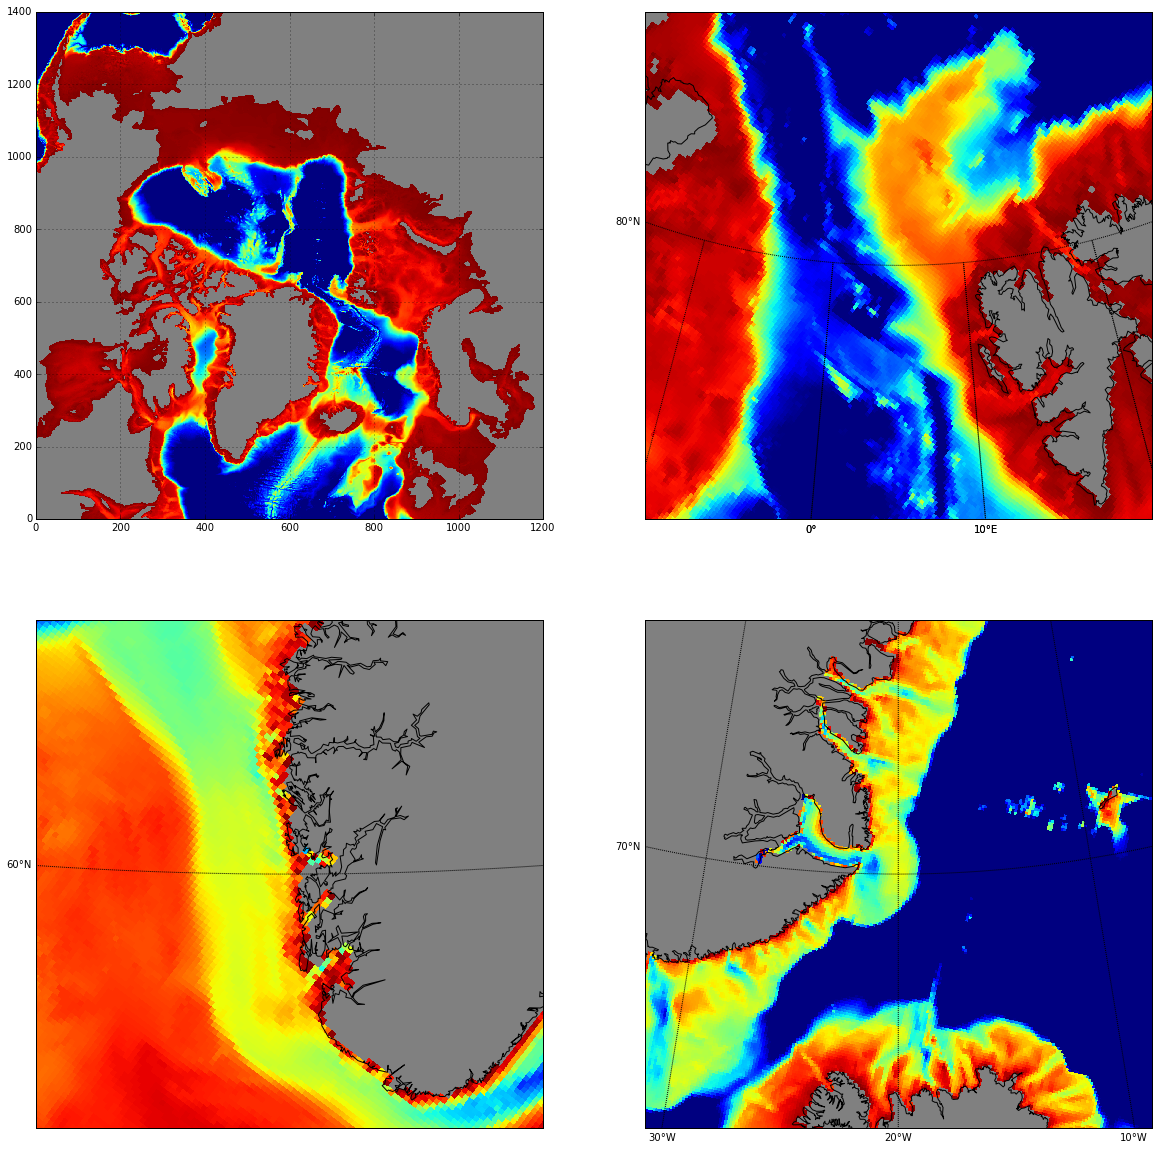

In [61]:
print "PAss 1"
w3=modeltools.bathy.remove_one_neighbour_cells(w2)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

print "PAss 2"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=modeltools.bathy.default_threshold,w3)

plot_excerpt(lon,lat,w3)

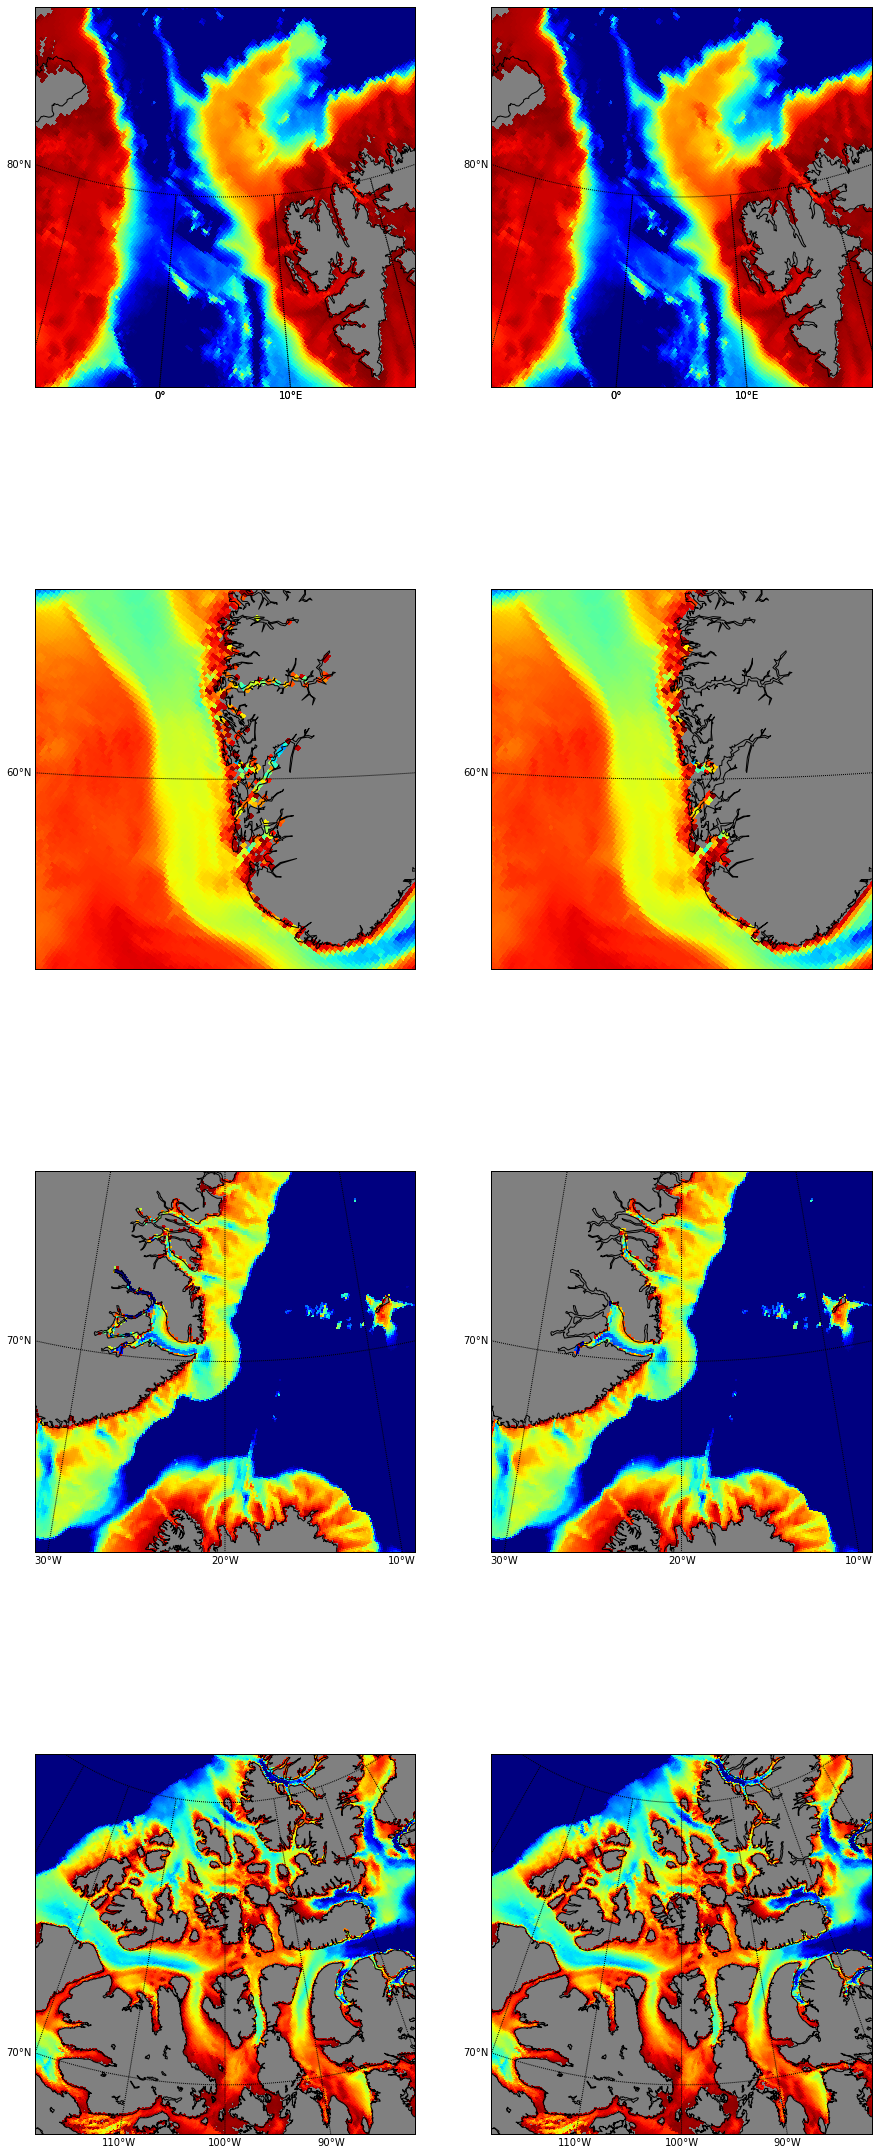

In [62]:
def plot_sidebyside(lon,lat,w2,w3) :

    figure = matplotlib.pyplot.figure(figsize=(15,40))

    ax=figure.add_subplot(421)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)
    
    ax=figure.add_subplot(422)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-3000,0)


    ax=figure.add_subplot(423)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(424)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    
    ax=figure.add_subplot(425)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(426)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)
    
    
    ax=figure.add_subplot(427)
    m = Basemap(width=1500000,height=1500000,
                resolution='i',projection='stere',\
                lat_ts=75,lat_0=75,lon_0=-100)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(428)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
    
plot_sidebyside(lon,lat,w2,w3)

In [63]:
modeltools.hycom.io.write_bathymetry("TTT",1,-w3,-modeltools.bathy.default_threshold)


DEBUG:root:Endianness set to big


in write_bathymetry 870820 1680000


DEBUG:root:Endianness set to big


5.5 7344.0


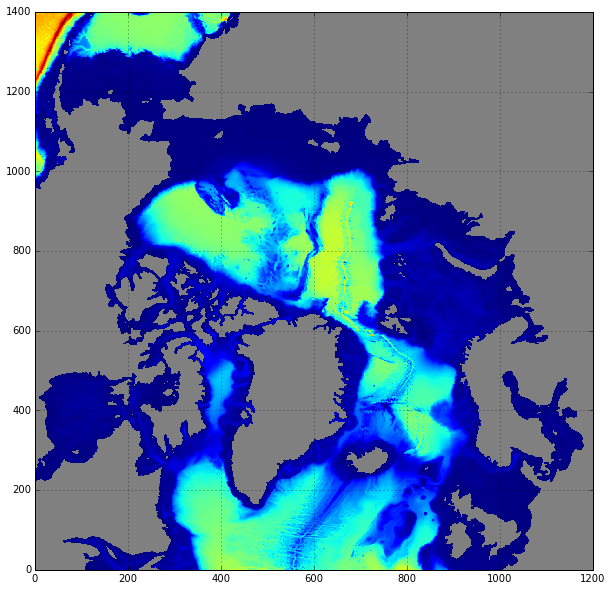

In [64]:
tmp=modeltools.hycom.io.ABFileBathy("depth_TTT_01","r",w3.shape[1],w3.shape[0])
w4=tmp.readfield("depth")
w4=numpy.ma.masked_where(w4> modeltools.hycom.io.AFile._huge*.5,w4)
tmp.close()
figure = matplotlib.pyplot.figure(figsize=(10,10))
ax=figure.add_subplot(111)
P=matplotlib.pyplot.pcolormesh(w4)
#P.set_clim(0,3000)
ax = P.get_axes()
ax.set_axis_bgcolor('.5')
ax.grid()
